In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### - Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. 

In [2]:
ds = pd.read_csv('Lligues europees UEFA.csv', sep=';', index_col=0, encoding='ISO-8859-1')
df_uefa = pd.DataFrame(ds)
df_uefa

,Squad,Country,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
Rk,,,,,,,,,,,,,,,,,,,,
1,Manchester City,ENG,1,37,28,6,3,96,24,72,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
2,Liverpool,ENG,2,36,26,8,2,89,24,65,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
3,Real Madrid,ESP,1,37,26,7,4,80,31,49,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
4,Bayern Munich,GER,1,34,24,5,5,97,37,60,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
5,Paris S-G,FRA,1,37,25,8,4,85,36,49,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbappé - 25,Keylor Navas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Bordeaux,FRA,20,37,5,13,19,48,89,-41,28,0.76,41.3,68.5,-27.2,-0.73,D L L L D,22083,Hwang Ui-jo - 11,Benoît Costil
95,Venezia,ITA,20,37,6,8,23,34,69,-35,26,0.70,35.4,70.5,-35.1,-0.95,L L L W D,6705,Thomas Henry - 9,Sergio Romero
96,Watford,ENG,19,37,6,5,26,33,75,-42,23,0.62,37.8,64.1,-26.3,-0.71,L L L D L,20614,Emmanuel Dennis - 10,Ben Foster


In [3]:
df_uefa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1 to 98
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Squad            98 non-null     object 
 1   Country          98 non-null     object 
 2   LgRk             98 non-null     int64  
 3   MP               98 non-null     int64  
 4   W                98 non-null     int64  
 5   D                98 non-null     int64  
 6   L                98 non-null     int64  
 7   GF               98 non-null     int64  
 8   GA               98 non-null     int64  
 9   GD               98 non-null     int64  
 10  Pts              98 non-null     int64  
 11  Pts/G            98 non-null     float64
 12  xG               98 non-null     float64
 13  xGA              98 non-null     float64
 14  xGD              98 non-null     float64
 15  xGD/90           98 non-null     float64
 16  Last 5           98 non-null     object 
 17  Attendance       9

In [4]:
df_uefa.columns

Index(['Squad', 'Country', 'LgRk', 'MP', 'W', 'D', 'L', 'GF', 'GA', 'GD',
       'Pts', 'Pts/G', 'xG', 'xGA', 'xGD', 'xGD/90', 'Last 5', 'Attendance',
       'Top Team Scorer', 'Goalkeeper'],
      dtype='object')

## Descripción de las columnas

* Squad: Nombre del club.
* Country: País al que pertenece el equipo.
* LgRk: Posición en la que terminó el equipo en la liga de su país.
* MP: Partidos jugados durante la temporada.
* W: Partidos ganados.
* D: Partidos empatados.
* L: Partidos perdidos.
* GF: Goles a favor.
* GA: Goles en contra.
* GD: Diferencia de goles.
* Pts: Puntos obtenidos.
* Pts/G: Promedio de puntos obtenidos sobre el total de partidos jugados.
* xG: Número de goles esperados de uno o varios jugadores, depende de la calidad de los tiros.
* xGA: Cantidad de goles esperados de los oponentes depende de la calidad de los tiros.
* xGD: Diferencia entre los goles anotados esperados y los fallados esperados. xGD=xG-xGA.
* xGD/90: Número de goles esperados de uno o varios jugadores en 90 minutos.
* Last 5: Resultado de los últimos 5 partidos (ganados, empatados y perdidos).
* Attendance: Número total de asistencias.
* Top Team Scorer: Nombre del goleador y cantidad de goles.
* Goalkeeper: Nombre del portero.

In [5]:
df_uefa.describe()

,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


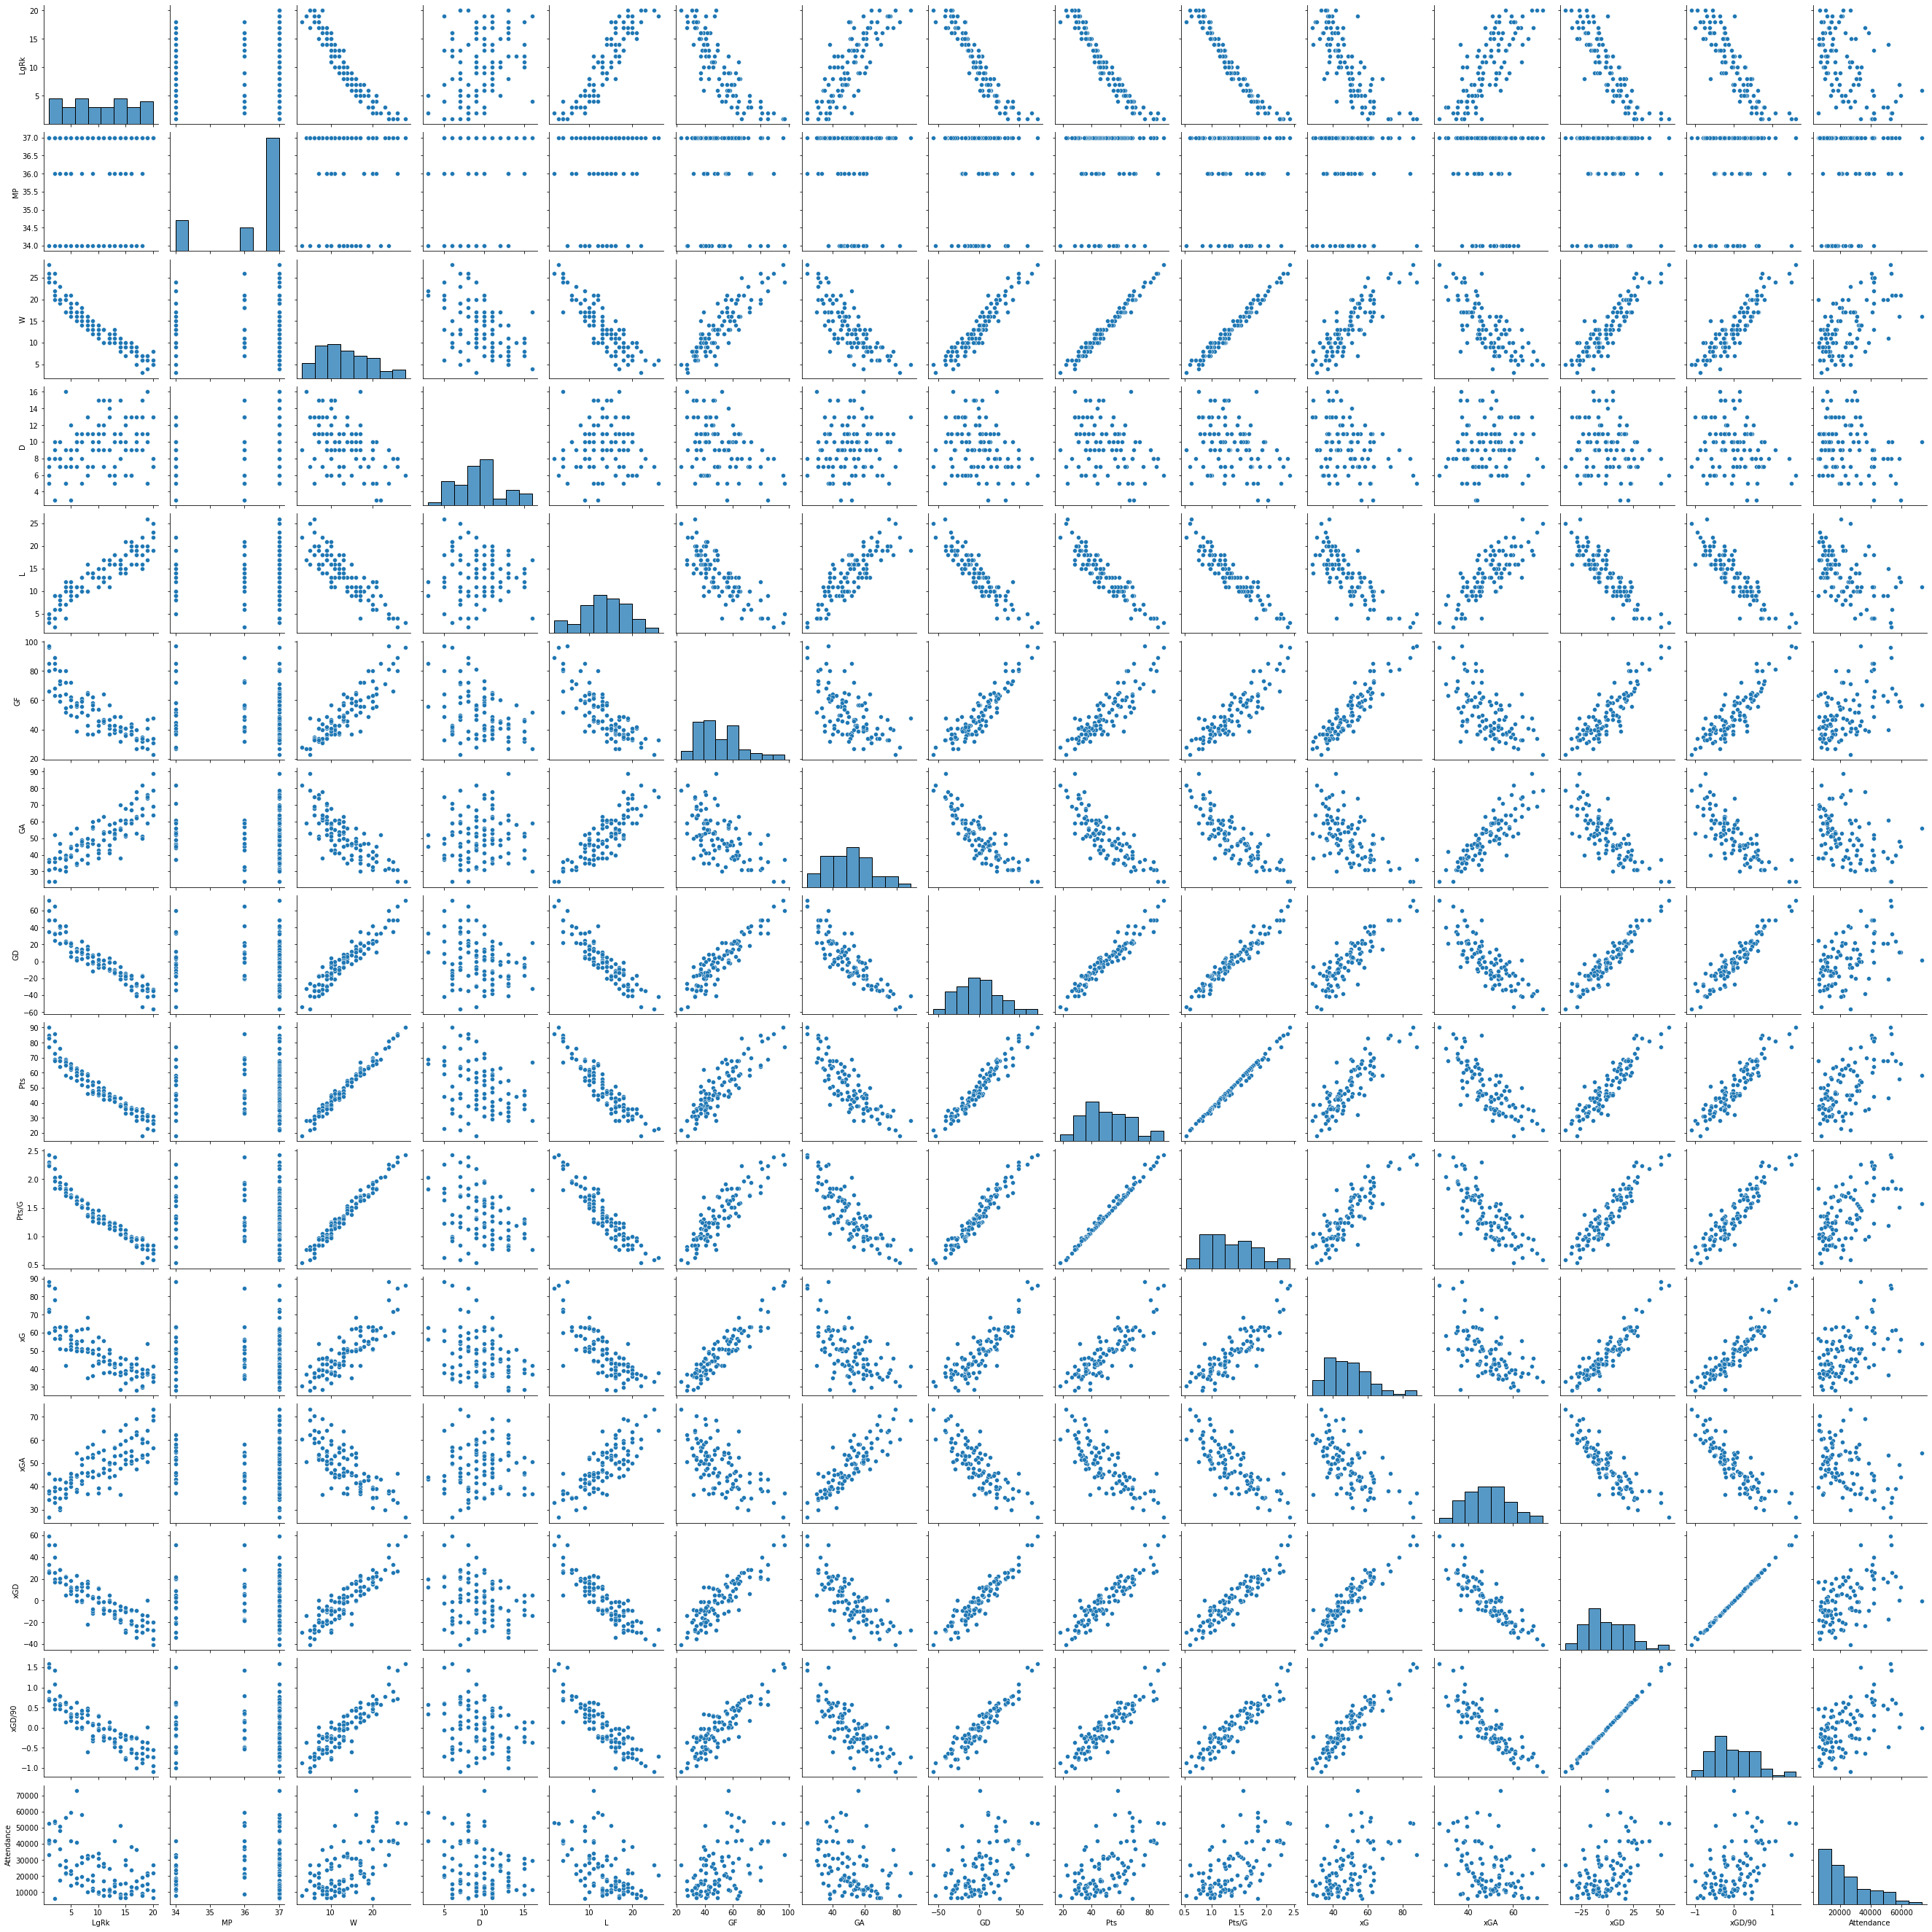

In [6]:
sns.pairplot(df_uefa, diag_kind="hist")

In [7]:
df_uefa.isnull().sum()

Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

In [8]:
df_uefa.isna().sum()

Squad              0
Country            0
LgRk               0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
GD                 0
Pts                0
Pts/G              0
xG                 0
xGA                0
xGD                0
xGD/90             0
Last 5             0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
dtype: int64

### Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

Shapiro-Wilk Normality Test
* Muestra= LgRk Posición en la que terminó el equipo en la liga de su país.
* α=0,05
* H0: la muestra tiene una distribución gaussiana.
* H1: la muestra no tiene distribución gaussiana.

In [9]:
from scipy.stats import shapiro
data = df_uefa['LgRk']
stat, p = shapiro(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=0.952, p=0.001
Probably not Gaussian


El valor P es menor que α , entonces se rechaza la hipótesis nula.

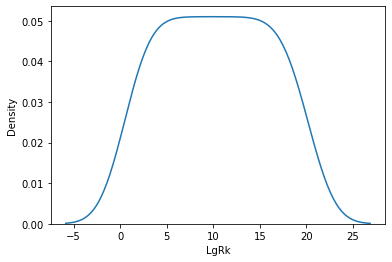

In [10]:
sns.kdeplot(df_uefa['LgRk'])
plt.show()

## - Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.


* Variables seleccionadas: LgRk: Ranking del club. W: Partidos ganados.
* α=0,05
* H0: las dos muestras son independientes.
* H1: existe una dependencia entre las muestras.

In [11]:
# Pearson's Correlation test
from scipy.stats import pearsonr
data1 = df_uefa['LgRk']
data2 = df_uefa['W']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably independent')
else:
 print('Probably dependent')

stat=-0.953, p=0.000
Probably dependent


El valor P es menor que α , entonces se rechaza la hipótesis nula.

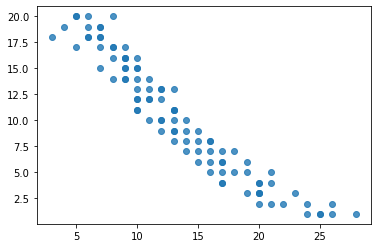

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=df_uefa['W'], y=df_uefa['LgRk'], alpha= 0.8)


El diagrama de dispersión parece indicar una relación lineal positiva entre ambas variables.

## - Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

* GF: Goles a favor, xG: Número de goles esperados de uno o varios jugadores, Attendance: Número total de asistencias.
* H0: las distribuciones de todas las muestras son iguales.
* H1: las distribuciones de una o más muestras no son iguales.
* α=0,05

In [14]:
# Friedman Test
from scipy.stats import friedmanchisquare
data1 = df_uefa['GF']
data2 = df_uefa['xG']
data3 = df_uefa['Attendance']
stat, p = friedmanchisquare(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=149.041, p=0.000
Probably different distributions


El valor P es menor que α , entonces se rechaza la hipótesis nula.

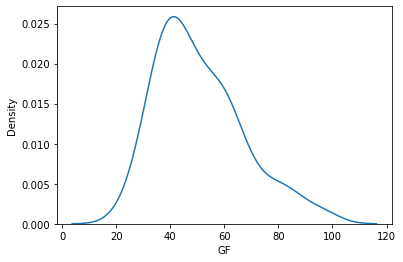

In [15]:
sns.kdeplot(df_uefa['GF'])
plt.show()

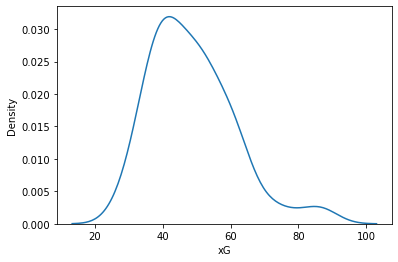

In [18]:
sns.kdeplot(df_uefa['xG'])
plt.show()

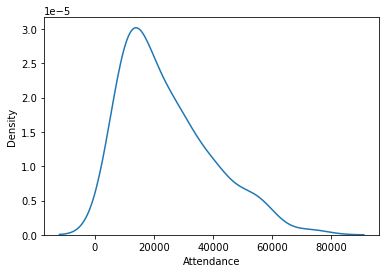

In [19]:
sns.kdeplot(df_uefa['Attendance'])
plt.show()

Gráficamente se aprecia que las distribuciones de las tres variables no son iguales. 